**PROBLEM STATEMENT:**
Use About Data:Random Forest to prepare a model on fraud data. Treating those who have taxable income <= 30000 as "Risky" and others are "Good"

IMPORT DATA

In [1]:
import pandas as pd
data = pd.read_csv("https://drive.google.com/uc?id=13U55FgBjqyZ5fGDTbHDpYQ5CvUiYhUuy")

In [2]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


1)NO COLUMN HAS NULL VALUES

2)GIVEN THAT IF TAXABLE INCOME IS LESS THAN OR EQUALS TO 30000 THEN IT IS RISKY OTHERWISE GOOD

3)THERE IS NO TARGET COLUMN IN THE DATA, SO WE HAVE TO ADD

In [4]:
check = data["Taxable.Income"]<=30000
print(check)

print(check.value_counts())
data['target']=check.map({False:1,True:0})



0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: Taxable.Income, Length: 600, dtype: bool
Taxable.Income
False    476
True     124
Name: count, dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   target           600 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 32.9+ KB


In [6]:
data['target'].value_counts()

,count
target,
1,476
0,124


RESPECTIVE COUNT OF RISKY AND GOOD

RISKY -1

GOOD  -0

In [7]:
data['target'].value_counts()

,count
target,
1,476
0,124


In [8]:
data.duplicated().sum()

0

**DATA PREPROCESSING**

AS THERE IS NOT A SINGLE NULL VALUE IN ANY COLUMN , WE ARE NOT GOING TO HANDLE THE MISSING VALUES

**LABEL ENCODING**

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include="object").columns
continous_columns = data.select_dtypes(include="int64").columns
label_encoder=LabelEncoder()
for col in categorical_columns:
 data[col]=label_encoder.fit_transform(data[col])

<Figure size 1000x600 with 0 Axes>

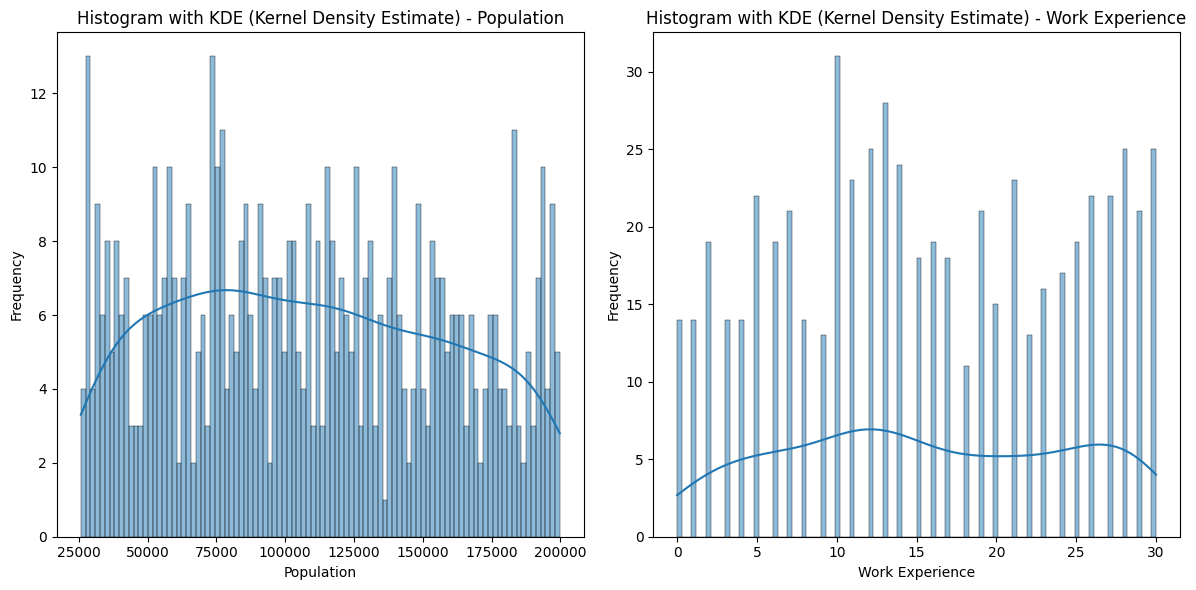

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.histplot(data['City.Population'], kde=True, bins=100, ax=axes[0])
axes[0].set_title("Histogram with KDE (Kernel Density Estimate) - Population")
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Frequency')


sns.histplot(data['Work.Experience'], kde=True, bins=100, ax=axes[1])
axes[1].set_title("Histogram with KDE (Kernel Density Estimate) - Work Experience")
axes[1].set_xlabel('Work Experience')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


REMOVING THE OUTLIERS

In [11]:
standard_deviation_1=data["City.Population"].std()
mean_1 =data["City.Population"].mean()

standard_deviation_2 =data["Work.Experience"].std()
mean_2=data["Work.Experience"].mean()
data=data[(data["City.Population"]<(3*standard_deviation_1+mean_1))&(data["City.Population"]>(-3*standard_deviation_1+mean_1))]
data=data[(data["Work.Experience"]<(3*standard_deviation_1+mean_1))&(data["Work.Experience"]>(-3*standard_deviation_1+mean_1))]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   target           600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


SCALING

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler1 = MinMaxScaler()

data["City.Population"]=scaler1.fit_transform(data["City.Population"].values.reshape(-1,1))
data["Work.Experience"]=scaler1.fit_transform(data["Work.Experience"].values.reshape(-1,1))
print(continous_columns)

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'target'], dtype='object')


SPLITTING DATA FOR TRAINING AND TESTING

In [13]:
from sklearn.model_selection import train_test_split

X =data.drop(columns=["target","Taxable.Income"])
y= data['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**MODEL**

In [14]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,0.139472,0.333333,1
1,1,0,0.622394,0.600000,1
2,0,1,0.772568,1.000000,1
3,1,2,0.962563,0.500000,1
4,0,1,0.010081,0.933333,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000,random_state=42)

model.fit(X_train,y_train)

y_predict = model.predict(X_test)

EVALUATING THE MODEL

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

print("The model precison_score is",f"{precision_score(y_test,y_predict):.10f}")
print("The model recall_score is ",f"{recall_score(y_test,y_predict):.10f}")
print("The mode f1_score is ",f1_score(y_test,y_predict))

The model precison_score is 0.7758620690
The model recall_score is  0.9574468085
The mode f1_score is  0.8571428571428571
